<a href="https://colab.research.google.com/github/Josephmathew882/Project-1-Adidas-Sales-Prediction-/blob/main/Adiddas_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADDIDAS SALES PREDICTION


**Aim of this project is to find sales of the products of the global brand Adidas.**

# DATA INFORMATION

**This dataset include details such as the number of units sold, the total sales, the location of the sales, the type of product sold, and other relevant information.The data in this dataset is continous so to anlyse this data we should use regression methods**

In [ ]:
#Importing the necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # for visualise by plotting the information.
import seaborn as sns #for visualisation
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# IMPORTING DATA

In [ ]:
df = pd.read_excel('/content/Adidas US Sales Datasets.xlsx', skiprows=4) #Importing the excel file and removing first 4 rows
df

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,NaN,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,NaN,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,NaN,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,NaN,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,NaN,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,NaN,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,NaN,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,NaN,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


In [ ]:
df.head()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,NaN,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,NaN,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,NaN,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,NaN,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [ ]:
df.shape

(9648, 14)

In [ ]:
df.info() #displaying datatypes of coloums

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        0 non-null      float64       
 1   Retailer          9648 non-null   object        
 2   Retailer ID       9648 non-null   int64         
 3   Invoice Date      9648 non-null   datetime64[ns]
 4   Region            9648 non-null   object        
 5   State             9648 non-null   object        
 6   City              9648 non-null   object        
 7   Product           9648 non-null   object        
 8   Price per Unit    9648 non-null   float64       
 9   Units Sold        9648 non-null   int64         
 10  Total Sales       9648 non-null   float64       
 11  Operating Profit  9648 non-null   float64       
 12  Operating Margin  9648 non-null   float64       
 13  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), fl

In [ ]:
df.describe() #Short description of the data

,Unnamed: 0,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,0.0,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,NaN,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,NaN,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,NaN,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,NaN,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,NaN,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,NaN,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,NaN,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000




# DATA CLEANING

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True) #dropping first coloumn

In [ ]:
df.isnull().sum() #finding the total null values of dataset

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

# DATA VISUALIZATION

**Pie chart of total sales of retailers of Adidas**

array([<Axes: ylabel='Total Sales'>], dtype=object)

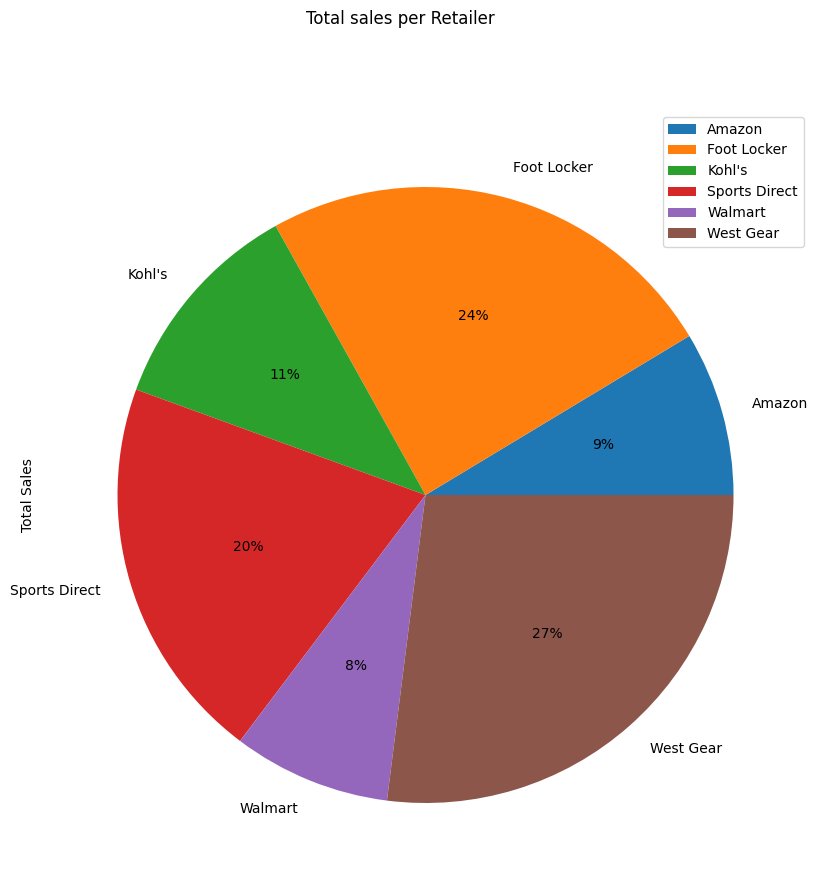

In [ ]:
top_retailers= df[['Retailer','Total Sales']].groupby('Retailer').sum()
top_retailers.plot(kind='pie',subplots=True,figsize=(20,10),title='Total sales per Retailer',autopct='%1.0f%%')

West Gear have highest sales compared to other retailers and Walmart have least sales.

**Bar Chart of top selling products**

Text(0.5, 1.0, 'Top Selling Products')

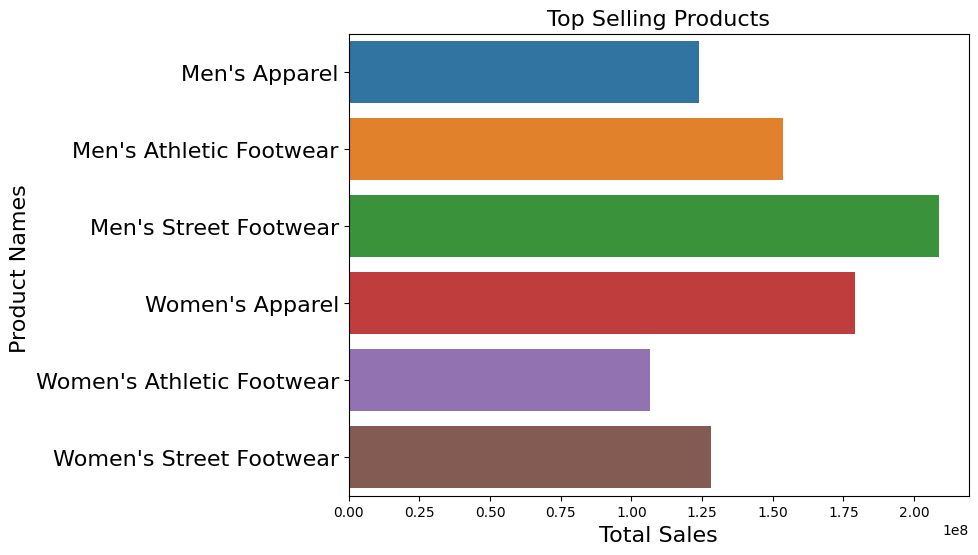

In [ ]:
top_selling_products = df.groupby('Product')['Total Sales'].sum().reset_index()
#group by products and apply sum function on Total Sales Column
top_selling_products.index+=1
fig , ax = plt.subplots(figsize=(8,6))

sns.barplot(data = top_selling_products,y= 'Product',x ='Total Sales')
ax.set_yticklabels(ax.get_yticklabels() , fontsize = 16)

ax.set_xlabel(' Total Sales ', fontsize = 16)
ax.set_ylabel('Product Names ', fontsize = 16)
ax.set_title('Top Selling Products', fontsize = 16)

**Pie chart of product count**

array([<Axes: ylabel='Product'>], dtype=object)

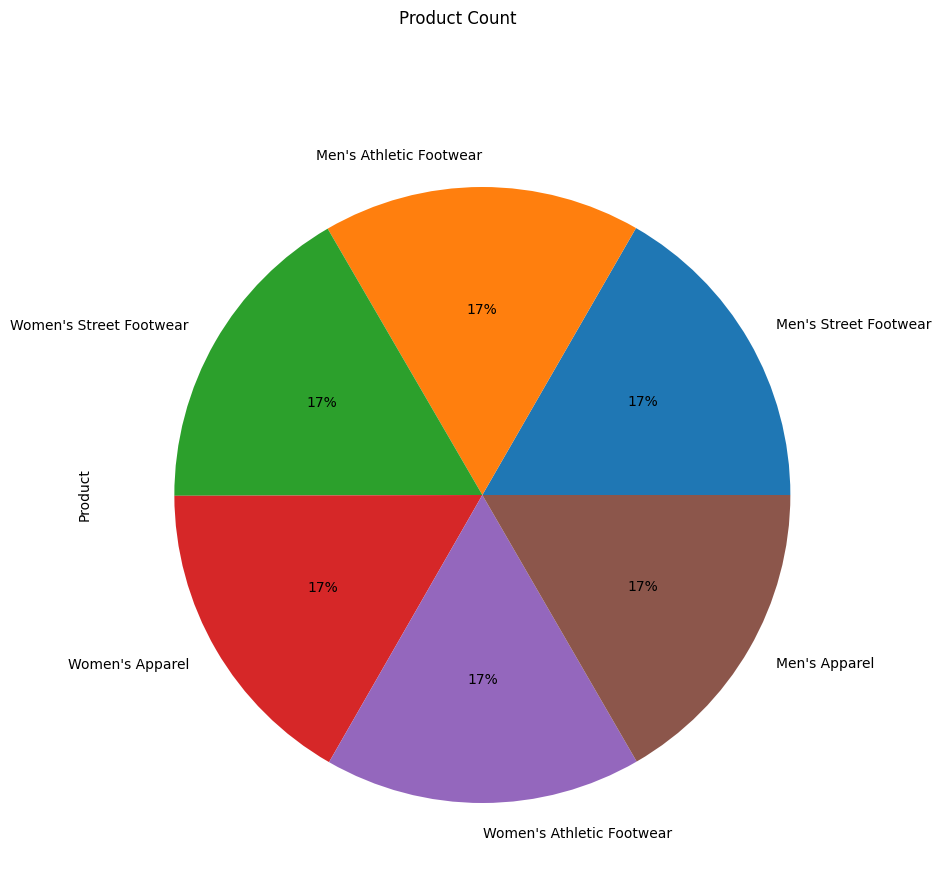

In [ ]:
df['Product'].value_counts().plot(kind='pie',subplots=True,figsize=(20,10),title='Product Count',autopct='%1.0f%%')

**Bar chart of count of sales method**

<Axes: xlabel='Sales Method', ylabel='count'>

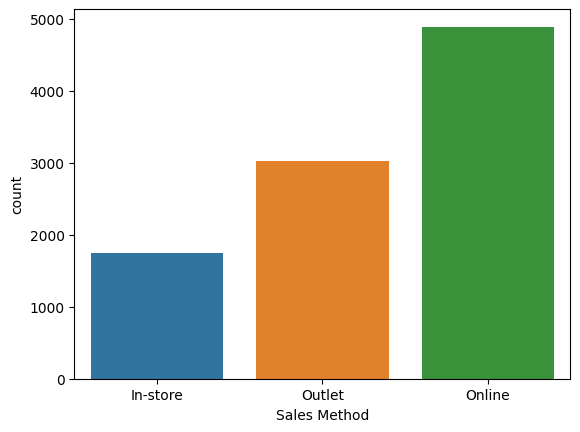

In [ ]:
sns.countplot(data=df, x = df['Sales Method'], label='Count')

Most sales is done through online method

**Correlation between different variable using heatmap**

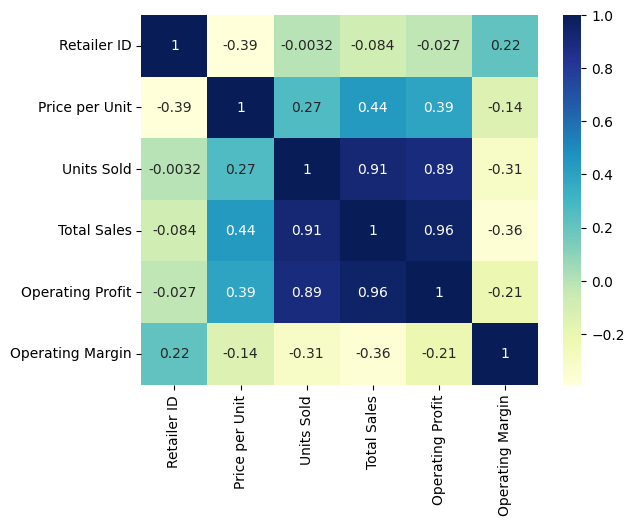

In [ ]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

Total sales have 0.96,0.91,0.44 correlation value with operating profit,unit sold and price per unit .

**Assigning input coloums to X and target coloumn to y**

In [ ]:
X = df[['Units Sold','Operating Profit','Operating Margin','Price per Unit']] #these 4 coloums are assigned to variable x
y = df['Total Sales'] #target value total sales coloum is assigned to variable y


#CROSS VALIDATION

**By cross validation we are identifying the best regression algorithm for processing the data set.**

In [ ]:
lin_score =cross_val_score(LinearRegression(),X=X,y=y,cv =5)
svr_score =cross_val_score(SVR(),X=X,y=y)
rfr_score =cross_val_score(RandomForestRegressor(random_state=15),X,y)
knr_score =cross_val_score(KNeighborsRegressor(n_neighbors = 5), X, y, cv=5)

In [ ]:
print(lin_score)
print(svr_score)
print(rfr_score)
print(knr_score)

[  0.78733874   0.97514593  -0.32355699 -55.22326495 -61.72798694]
[ -2.57865301  -1.92541006  -0.0479624  -20.59585388 -15.0478274 ]
[0.93677044 0.99812528 0.99979619 0.99877954 0.98456259]
[0.75577612 0.89869762 0.97315724 0.91655711 0.82768618]


**Finding the mean score of each algorithm and chosing the best algorithm for the data set**

In [ ]:
print(np.mean(lin_score))
print(np.mean(svr_score))
print(np.mean(rfr_score))
print(np.mean(knr_score))

-23.102464844415852
-8.03914135092668
0.9836068072945856
0.8743748553528533


**Dividing data set into training and test model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

From cross validation it is evident that Random Forest Regressor is the best algorith for the data set

#HYPERTUNING

**Finding the best parameter of Random Forest Regressor**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rfr_model =RandomForestRegressor(random_state=15)

In [ ]:
para_grids = {
            "n_estimators" : [10,15,20],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
        }

In [ ]:
grid = GridSearchCV(rfr_model, para_grids,cv=5)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=15),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [10, 15, 20]})

In [ ]:
grid_data =grid.cv_results_
database=pd.DataFrame(grid_data)
database.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.250348,0.006187,0.008173,0.000538,True,auto,10,"{'bootstrap': True, 'max_features': 'auto', 'n...",0.999317,0.999102,0.998028,0.997420,0.998418,0.998457,0.000695,9
1,0.374283,0.009883,0.013799,0.005314,True,auto,15,"{'bootstrap': True, 'max_features': 'auto', 'n...",0.999523,0.999254,0.998341,0.997422,0.998246,0.998557,0.000755,8
2,0.622409,0.332701,0.016592,0.007576,True,auto,20,"{'bootstrap': True, 'max_features': 'auto', 'n...",0.999561,0.999289,0.998406,0.997550,0.998296,0.998621,0.000725,5
3,0.106590,0.002578,0.007104,0.000791,True,log2,10,"{'bootstrap': True, 'max_features': 'log2', 'n...",0.998498,0.998316,0.997451,0.997140,0.997605,0.997802,0.000519,17
4,0.155788,0.003242,0.008930,0.000258,True,log2,15,"{'bootstrap': True, 'max_features': 'log2', 'n...",0.998792,0.998510,0.998027,0.997350,0.997728,0.998081,0.000520,12
5,0.208082,0.001470,0.011149,0.000410,True,log2,20,"{'bootstrap': True, 'max_features': 'log2', 'n...",0.998978,0.998588,0.998137,0.997754,0.998178,0.998327,0.000419,10
6,0.103729,0.001749,0.006663,0.000251,True,sqrt,10,"{'bootstrap': True, 'max_features': 'sqrt', 'n...",0.998498,0.998316,0.997451,0.997140,0.997605,0.997802,0.000519,17
7,0.156499,0.004531,0.008743,0.000165,True,sqrt,15,"{'bootstrap': True, 'max_features': 'sqrt', 'n...",0.998792,0.998510,0.998027,0.997350,0.997728,0.998081,0.000520,12
8,0.205880,0.004820,0.010719,0.000365,True,sqrt,20,"{'bootstrap': True, 'max_features': 'sqrt', 'n...",0.998978,0.998588,0.998137,0.997754,0.998178,0.998327,0.000419,10
9,0.228998,0.002486,0.008221,0.000943,False,auto,10,"{'bootstrap': False, 'max_features': 'auto', '...",0.998308,0.998979,0.996923,0.997765,0.997710,0.997937,0.000683,16


In [ ]:
grid.best_score_

0.9988375302307876

In [ ]:
grid.best_params_

{'bootstrap': False, 'max_features': 'log2', 'n_estimators': 20}

From hypertunning we have obtained best parameters  bootstrap': False, 'max_features': 'log2', 'n_estimators': 20 and best score

# PREDICTION

**Predicting the target value, total sales using random forest regressor model**

In [ ]:
model = RandomForestRegressor(random_state=15,n_estimators=20,bootstrap=False)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, n_estimators=20, random_state=15)

In [ ]:
y_predicted = model.predict(X_test)
y_predicted

array([4158.5 , 7950.  , 3928.  , ..., 7992.75, 2148.  , 2774.75])

**Finind the model and R2 score**

In [ ]:
model.score(X_test,y_test)

0.9993464226776402

In [ ]:
r2_score(y_predicted,y_test)

0.999345968781184

**Predicting the target sales using inputs**

In [ ]:
input_data = (1200,300000.00,0.50,50.0) #Units Sold','Operating Profit','Operating Margin','Price per Unit'
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print([prediction])

[array([600000.])]


In [ ]:
input_data = (1300,200000.00,0.40,40.0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print([prediction])

[array([495000.])]


# CONCLUSION

**From the machine learning analysis it is evident that Random Forest Regressor is best suitable algorithm for the given data set and using this model we can obtain the target values with an accuracy of 99.9%.**